# CsCl XRD

In [1]:
import numpy as np
import math
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import csv

In [2]:
wavelength = 0.1542 #nm
lattice_constant = 0.414 #nm

In [3]:
planes_df = pd.read_csv('All_Planes_hkl.csv')
miller_indices = planes_df.values

In [4]:
# Store this in a dataframe:
miller_list = [list(row) for row in miller_indices[0:12]]
df = pd.DataFrame({'Miller': miller_list})

In [5]:
df['hkl_squared'] = df['Miller'].apply(lambda x: x[0]**2 + x[1]**2 + x[2]**2)
df['sin theta (rad)'] = df['hkl_squared'].apply(lambda x: math.sqrt((wavelength**2/(4*lattice_constant**2))*x))
df['theta (rad)'] = df['sin theta (rad)'].apply(lambda x:(math.asin(x)))
df['theta (deg)'] = df['theta (rad)'].apply(lambda x: np.rad2deg(x))
df['2 theta (deg)'] = df['theta (deg)'].apply(lambda x: 2 * x)

In [6]:
df

,Miller,hkl_squared,sin theta (rad),theta (rad),theta (deg),2 theta (deg)
0,"[1, 0, 0]",1,0.186232,0.187326,10.732962,21.465925
1,"[1, 1, 0]",2,0.263372,0.266516,15.270219,30.540438
2,"[1, 1, 1]",3,0.322563,0.328436,18.818000,37.636001
3,"[2, 0, 0]",4,0.372464,0.381662,21.867645,43.735289
4,"[2, 1, 0]",5,0.416427,0.429512,24.609223,49.218447
5,"[2, 1, 1]",6,0.456173,0.473690,27.140438,54.280877
6,"[2, 2, 0]",8,0.526743,0.554765,31.785676,63.571353
7,"[2, 2, 1]",9,0.558696,0.592812,33.965641,67.931283
8,"[3, 0, 0]",9,0.558696,0.592812,33.965641,67.931283
9,"[3, 1, 0]",10,0.588917,0.629718,36.080188,72.160375


In [7]:
def store_atom_positions(csv_name):
    file_path = f"/Users/hendrikvossler/Desktop/GitHub/XRD/{csv_name}"
    
    atom_positions = {}

    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # skip the header
        for row in reader:
            atom_type = row[0]
            coords = list(map(float, row[1:]))
            if atom_type not in atom_positions:
                atom_positions[atom_type] = []
            atom_positions[atom_type].append(coords)

    # Convert lists to numpy arrays
    for atom_type, positions in atom_positions.items():
        atom_positions[atom_type] = np.array(positions)

    return atom_positions

In [8]:
atom_positions = store_atom_positions('CsCl_atom_positions.csv')

In [9]:
# Define atom positons in cubic cell:
# Cs_positions = np.array([[0.0, 0.0, 0.0]])
# Cl_positions = np.array([[0.5, 0.5, 0.5]])

In [10]:
# This calculates the term that will be multiplied by the atomic scattering factor
# for each atom type and for each miller incices
def compute_structure_factor_term(atom_positions, miller_indices_array):
    results = {}
    
    for miller_indices in miller_indices_array:
        h, k, l = miller_indices
        total = 0
        
        for position in atom_positions:
            position_adjusted = 2*position # distribute the 2 in the exponential factor to each atom position
            x, y, z = position_adjusted
            value = x * h + y * k + z * l

            # Check if value is even or 0
            if value % 2 == 0:
                total += 1
            # If value is odd
            else:
                total -= 1
        
        # Store the result with Miller indices as the key
        results[tuple(miller_indices)] = total
    
    return results

In [11]:
Cs_structure_factor_term = compute_structure_factor_term(atom_positions["Cs"], miller_indices)
Cl_structure_factor_term = compute_structure_factor_term(atom_positions["Cl"], miller_indices)

print("Cs", Cs_structure_factor_term)
print("Cl", Cl_structure_factor_term)


Cs {(1, 0, 0): 1, (1, 1, 0): 1, (1, 1, 1): 1, (2, 0, 0): 1, (2, 1, 0): 1, (2, 1, 1): 1, (2, 2, 0): 1, (2, 2, 1): 1, (3, 0, 0): 1, (3, 1, 0): 1, (3, 1, 1): 1, (2, 2, 2): 1, (3, 2, 0): 1, (3, 2, 1): 1, (4, 0, 0): 1, (3, 2, 2): 1, (4, 1, 0): 1, (3, 3, 0): 1, (4, 1, 1): 1, (3, 3, 1): 1, (4, 2, 0): 1, (4, 2, 1): 1, (3, 3, 2): 1, (4, 2, 2): 1, (5, 0, 0): 1, (4, 3, 1): 1, (5, 1, 0): 1, (3, 3, 3): 1, (5, 1, 1): 1, (4, 3, 2): 1, (5, 2, 0): 1, (5, 2, 1): 1, (4, 4, 0): 1, (4, 4, 1): 1, (5, 2, 2): 1, (4, 3, 3): 1, (5, 3, 0): 1, (5, 3, 1): 1, (4, 4, 2): 1, (6, 0, 0): 1, (6, 1, 0): 1, (5, 2, 3): 1, (6, 2, 0): 1, (4, 4, 3): 1, (5, 4, 0): 1, (5, 4, 1): 1, (5, 2, 4): 1, (4, 4, 4): 1}
Cl {(1, 0, 0): -1, (1, 1, 0): 1, (1, 1, 1): -1, (2, 0, 0): 1, (2, 1, 0): -1, (2, 1, 1): 1, (2, 2, 0): 1, (2, 2, 1): -1, (3, 0, 0): -1, (3, 1, 0): 1, (3, 1, 1): -1, (2, 2, 2): 1, (3, 2, 0): -1, (3, 2, 1): 1, (4, 0, 0): 1, (3, 2, 2): -1, (4, 1, 0): -1, (3, 3, 0): 1, (4, 1, 1): 1, (3, 3, 1): -1, (4, 2, 0): 1, (4, 2, 1): -1, (

In [12]:
# This calculates f, the atomic scattering factor, for each atom time at each theta angle 
# check the angle calculation units
def calc_atomic_scattering_factor(theta, atomic_number, a1, b1, a2, b2, a3, b3, a4=None, b4=None, wavelength = 0.1542):
    s = math.sin(theta)/(wavelength*10)
    f = atomic_number - (41.78214 * s**2) * (a1*np.e**(-b1*s**2) + a2*np.e**(-b2*s**2) + a3*np.e**(-b3*s**2) + a4*np.e**(-b4*s**2))
    return f

In [13]:
# Populate df with atomic scattering factors
df['Cs_f'] = df['theta (rad)'].apply(lambda x: calc_atomic_scattering_factor(x, 55, 6.062, 155.837, 5.986, 19,695, 3.303, 3.335, 1.096, 0.379))
df['Cl_f'] = df['theta (rad)'].apply(lambda x: calc_atomic_scattering_factor(x, 17, 1.452, 30.935, 2.292, 9.980, 0.787, 2.234, 0.322, 0.323))

In [14]:
# Define function to calculate multiplicity facor for each plane:
def get_unique_permutations(hkl):
    # Get all permutations of the Miller indices
    perms = list(itertools.permutations(hkl))
    
    # For each permutation, consider all possible sign changes
    all_permutations = []
    for perm in perms:
        signs = itertools.product([1, -1], repeat=3)
        for sign in signs:
            all_permutations.append(tuple([i*j for i, j in zip(perm, sign)]))
    
    # Return unique permutations (number of planes in family)
    return set(all_permutations)

In [28]:
# Calculate the structure factors using the atomic scattering factors- 
# my intensities dont match materials project
#this is definitely where the error is- adding up the structure factor- it works for single atom but not for multiple atoms
df['Structure Factor'] = (df['Cs_f'] * (df['Miller'].apply(lambda x: Cs_structure_factor_term[tuple(x)])) +
                              (df['Cl_f'] * (df['Miller'].apply(lambda x: Cl_structure_factor_term[tuple(x)]))))
df['F^2'] = df['Structure Factor']**2
#df['p'] = [6, 12, 8, 6, 24, 12, 6, 24, 24, 8]
df['p'] = df['Miller'].apply(lambda x: len(get_unique_permutations(x)))
df['Lorentz_factor'] = df['theta (rad)'].apply(lambda x: (1+(math.cos(2*x)**2)) / (math.sin(x)**2 * math.cos(x)))
df['Intensity'] = df['F^2']*df['p']*df['Lorentz_factor']
df["Intensity_norm"] = (df["Intensity"]*100/df["Intensity"].max())


In [29]:
df

,Miller,hkl_squared,sin theta (rad),theta (rad),theta (deg),2 theta (deg),Cs_f,Cl_f,Structure Factor,F^2,p,Lorentz_factor,Intensity,Intensity_norm
0,"[1, 0, 0]",1,0.186232,0.187326,10.732962,21.465925,-15.889269,14.569276,-30.458544,927.722931,6,54.763042,3.048296e+05,0.810320
1,"[1, 1, 0]",2,0.263372,0.266516,15.270219,30.540438,-85.356720,12.906652,-72.450068,5249.012333,12,26.029587,1.639555e+06,4.358387
2,"[1, 1, 1]",3,0.322563,0.328436,18.818000,37.636001,-153.542843,11.721237,-165.264080,27312.215990,8,16.521382,3.609884e+06,9.596060
3,"[2, 0, 0]",4,0.372464,0.381662,21.867645,43.735289,-220.536004,10.842168,-209.693836,43971.504828,6,11.822127,3.119020e+06,8.291209
4,"[2, 1, 0]",5,0.416427,0.429512,24.609223,49.218447,-286.392750,10.167567,-296.560318,87948.021940,24,9.048814,1.909981e+07,50.772509
5,"[2, 1, 1]",6,0.456173,0.473690,27.140438,54.280877,-351.150486,9.635189,-341.515298,116632.698435,24,7.240686,2.026802e+07,53.877934
6,"[2, 2, 0]",8,0.526743,0.554765,31.785676,63.571353,-477.466721,8.852895,-468.613826,219598.918178,12,5.079994,1.338673e+07,35.585599
7,"[2, 2, 1]",9,0.558696,0.592812,33.965641,67.931283,-539.060632,8.558853,-547.619485,299887.100291,24,4.408063,3.172611e+07,84.336678
8,"[3, 0, 0]",9,0.558696,0.592812,33.965641,67.931283,-539.060632,8.558853,-547.619485,299887.100291,6,4.408063,7.931528e+06,21.084169
9,"[3, 1, 0]",10,0.588917,0.629718,36.080188,72.160375,-599.630915,8.310364,-591.320551,349659.994465,24,3.902432,3.274858e+07,87.054689


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

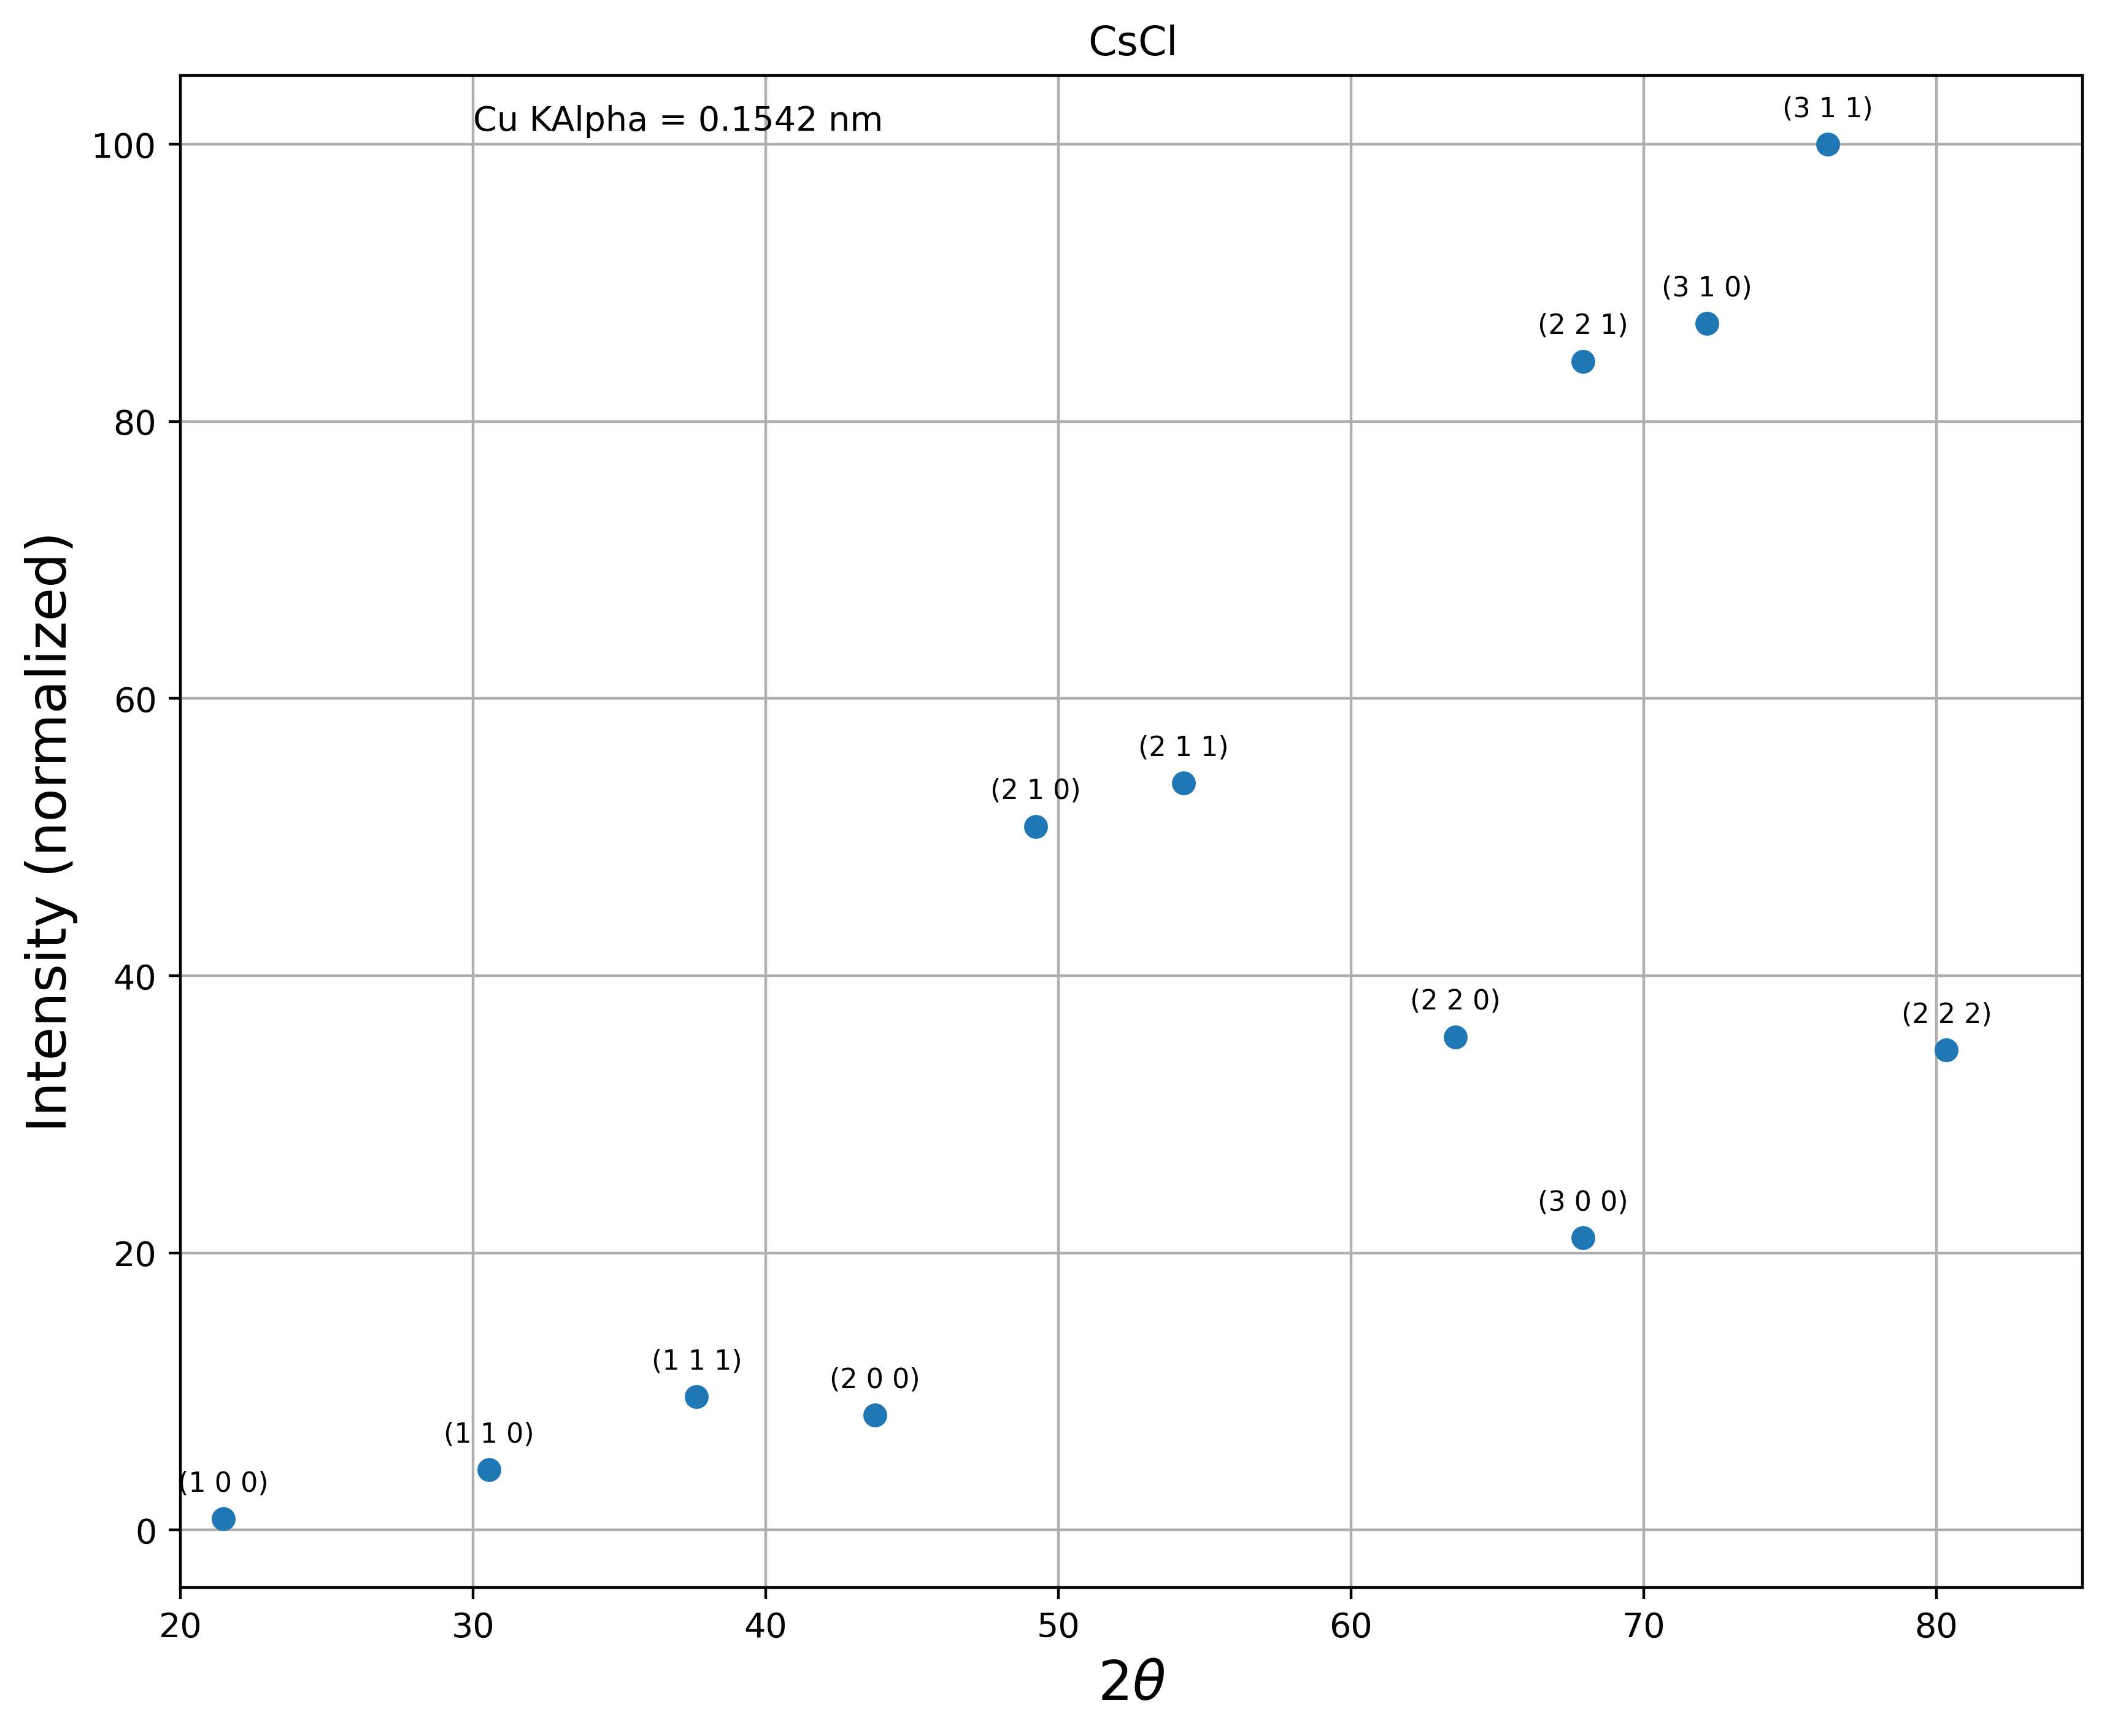

In [30]:
# Filter out forbidden reflections
fig = plt.figure(figsize=(10, 8), dpi = 400)
filtered_df = df[df['Intensity_norm'] != 0]
x = filtered_df['2 theta (deg)']
y = filtered_df['Intensity_norm']
plt.plot(x, y, 'o')

# Add text labels above each data point
for index, row in filtered_df.iterrows():
    label = str(row['Miller']).replace('[', '(').replace(']', ')').replace(',', '')
    x = row['2 theta (deg)']
    y = row['Intensity_norm']
    plt.text(x, y + 0.02 * max(filtered_df['Intensity_norm']), label, ha='center', fontsize=8)

# Figure formatting
plt.text(30, 101, "Cu KAlpha = 0.1542 nm")
plt.xlim(20, 85)
plt.xlabel("2"r'$\theta$', fontsize = 16)
plt.ylabel('Intensity (normalized)', fontsize = 16)
plt.title(r'$\mathrm{CsCl}$')
plt.grid()
plt.tight_layout
